In [1]:
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import matplotlib.colors
import pandas as pd
import sys
import warnings
!pip install geopandas
import geopandas as gpd
from matplotlib.pyplot import *
#warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 
     |████████████████████████████████| 15.4 MB 35.5 MB/s 


In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Initialize empty lists for surface and subsurface lakes
year_sur = list()
elevation_sur = list()
area_sur = list()
region_sur = list()

year_sub = list()
elevation_sub = list()
area_sub = list()
region_sub = list()
surface_sub = list()

regions =['SW', 'CW', 'NW', 'NO', 'NE', 'SE']
years = [2018, 2019]

In [6]:
for region in regions:
    for year in years:
        print(region, year)
        surface_file = f'/content/drive/My Drive/Research/Greenland_CNN_project/data/lakes/surface/surface_{region}{year}.geojson'
        surface_gdf = gpd.read_file(surface_file)
        for index, lake in surface_gdf.iterrows():
            year_sur.append(lake.year)
            elevation_sur.append(lake.elevation)
            area_sur.append(lake.area/(1000*1000))
            region_sur.append(lake.region)

        subsurface_file = f'/content/drive/My Drive/Research/Greenland_CNN_project/data/lakes/subsurface/subsurface_{region}{year}.geojson'
        subsurface_gdf = gpd.read_file(subsurface_file)
        for index, lake in subsurface_gdf.iterrows():
            year_sub.append(lake.year)
            elevation_sub.append(lake.elevation)
            area_sub.append(lake.area)
            region_sub.append(lake.region)
            surface_sub.append(lake.surface)
        
        

SW 2018
SW 2019
CW 2018
CW 2019
NW 2018
NW 2019
NO 2018
NO 2019
NE 2018
NE 2019
SE 2018
SE 2019


In [7]:
d_sur = {'year':year_sur, 'region':region_sur, 'area':area_sur, 'elevation':elevation_sur}
surface = pd.DataFrame(data=d_sur)

d_sub = {'year':year_sub, 'region':region_sub, 'area':area_sub, 'elevation':elevation_sub, 'surface':surface_sub}
subsurface = pd.DataFrame(data=d_sub)

In [ ]:
summary = subsurface.groupby([subsurface.year, subsurface.region]).max()
summary['total'] = subsurface.groupby([subsurface.year, subsurface.region]).count()['area']
#summary['percent'] = summary['surface']/summary['total']
summary['area']/1002**2

year  region
2018  CW        2.510231
      NE        1.791922
      NO        0.505329
      NW        2.169124
      SE        2.063756
      SW        3.501754
2019  CW        2.674967
      NE        1.505453
      NO        0.609313
      NW        3.083179
      SE        2.879999
      SW        3.929730
Name: area, dtype: float64

In [ ]:
sub_stats = subsurface.groupby(['year', 'region']).agg({'area':['sum', 'mean', 'max'], 'elevation':['mean', 'min', 'max','count']})
sub_stats['area'] = sub_stats['area']/(1000**2)
sub_stats

area                      ...    elevation                   
                    sum      mean       max  ...          min          max count
year region                                  ...                                
2018 CW       63.579113  0.714372  2.520282  ...  1242.379496  1827.989066    89
     NE        9.244320  0.486543  1.799097  ...   758.161813  1715.453982    19
     NO        1.203779  0.300945  0.507352  ...   612.645118  1122.146994     4
     NW       65.811597  0.553039  2.177809  ...   455.712077  1506.693973   119
     SE       33.863139  0.604699  2.072019  ...   876.665205  2170.546747    56
     SW       67.387578  0.774570  3.515775  ...  1363.958401  2175.724604    87
2019 CW       63.833026  0.829000  2.685678  ...  1295.736628  1894.863273    77
     NE       54.021580  0.432173  1.511481  ...   660.339421  2268.156147   125
     NO        9.043913  0.244430  0.611752  ...   835.210208  1310.564701    37
     NW      127.910521  0.614954  3.095524  ...   675.559314  1799.314652   208
     SE       48.798487  0.677757  2.891530  ...   999.265912  2443.816916    72
     SW       72.360784  0.904510  3.945465  ...  1470.716688  2175.333167    80

[12 rows x 7 columns]

In [ ]:
sur_stats = surface.groupby(['year', 'region']).agg({'area':['sum', 'mean', 'max'], 'elevation':['mean', 'min', 'max','count']})
sur_stats

area                       ...   elevation                   
                    sum      mean        max  ...         min          max count
year region                                   ...                               
2018 CW      304.531517  0.448500   6.183410  ...   41.307291  1634.365650   679
     NE      201.721693  0.286130   3.450132  ...   56.116654  1632.660080   705
     NO      158.094878  0.293311   7.606283  ...   74.951046  1286.126228   539
     NW      154.987328  0.244846   2.093174  ...   67.110366  1501.499136   633
     SE       55.220723  0.259252   2.620081  ...  129.279520  1855.157651   213
     SW      367.575453  0.341296   3.832136  ...  558.499701  2019.415709  1077
2019 CW      568.931166  0.568931  10.360401  ...   42.101832  1829.511404  1000
     NE      640.351562  0.415813  22.323864  ...   69.038007  2251.537042  1540
     NO      261.554565  0.346889   8.561393  ...   73.557264  1346.913521   754
     NW      348.396397  0.335966   8.418957  ...   69.504024  1708.285970  1037
     SE       81.862236  0.281314   4.632145  ...  191.642336  2216.545225   291
     SW      667.788077  0.438181  18.362041  ...  394.233816  2195.431414  1524

[12 rows x 7 columns]

SW
81.67374100014123
7.380003460060019
CW
86.82176876645799
0.3993645968997177
NW
124.79024747204772
94.35863399204382
NO
65.44151764265253
651.2935765168814
NE
217.4430832883746
484.3758992440259
SE
48.245500408691925
44.10502860619676


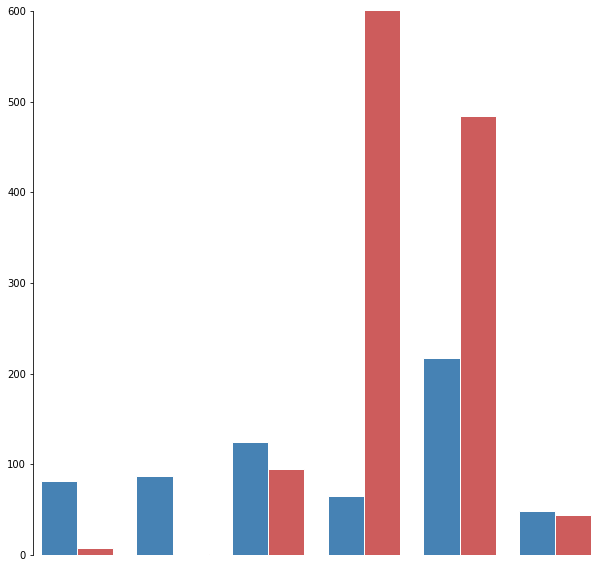

In [ ]:
#sur_area2018 = 0
sur_area2019 = 0
sub_area2018 = 0
sub_area2019 = 0

sur_N2018 = 0
sur_N2019 = 0
sub_N2018 = 0
sub_N2019 = 0
fig, ax = plt.subplots(1,6, figsize = (10,10))
for i in range(len(regions)):
    r = regions[i]
    print(r)
    rsur = surface[surface.region == r]
    rsur2018 = rsur[rsur.year == 2018]
    rsur2019 = rsur[rsur.year == 2019]
    sur_N2018 = sur_N2018 + len(rsur2018)
    sur_N2019 = sur_N2019 + len(rsur2019)
    Nsur = len(rsur2018)/len(rsur2019)
    Asur = (rsur2018['area'].sum()-rsur2019['area'].sum())*-100/rsur2018['area'].sum()
    print(Asur)
    sur_area2018 = sur_area2018 + rsur2018['area'].sum()
    sur_area2019 = sur_area2019 + rsur2019['area'].sum()

    rsub = subsurface[subsurface.region == r]
    rsub2018 = rsub[rsub.year == 2018]
    rsub2019 = rsub[rsub.year == 2019]
    sub_N2018 = sub_N2018 + len(rsub2018)
    sub_N2019 = sub_N2019 + len(rsub2019)
    Nsub = len(rsub2018)/len(rsub2019)
    Asub = (rsub2018['area'].sum()-rsub2019['area'].sum())*-100/rsub2018['area'].sum()
    print(Asub)
    A2018 = rsub2018['area'].sum()
    A2019 = rsub2019['area'].sum()
    sub_area2018 = sub_area2018 + rsub2018['area'].sum()
    sub_area2019 = sub_area2019 + rsub2019['area'].sum()

    bars1 = [Asur]
    #bars2 = [0]
    bars2 = [Asub]
  # Set position of bar on X axis
    barWidth = 0.25
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
  # Make the plot
    ax[i].set_ylim([0,600])
    ax[i].set_xticks([])
    ax[i].bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='Surface')
    ax[i].bar(r2, bars2, color='indianred', width=barWidth, edgecolor='white', label='Subsurface')
    ##ax[i].set_xlabel(r, fontsize = 14)
    if i ==0:
        sns.despine(ax=ax[i], bottom = True, offset=4, trim=False)
        #ax[i].set_ylabel('2018:2019 lake area', fontsize = 16)
    else:
        sns.despine(ax=ax[i], bottom = True, left = True, offset=4, trim=False)
        ax[i].set_yticks([])
#ax[0].set_yticks([])
#plt.legend()
plt.savefig('/content/drive/My Drive/Research/Greenland_CNN_project/ratio.png', dpi = 300, transparent=True)

Lake elevation distribution by region


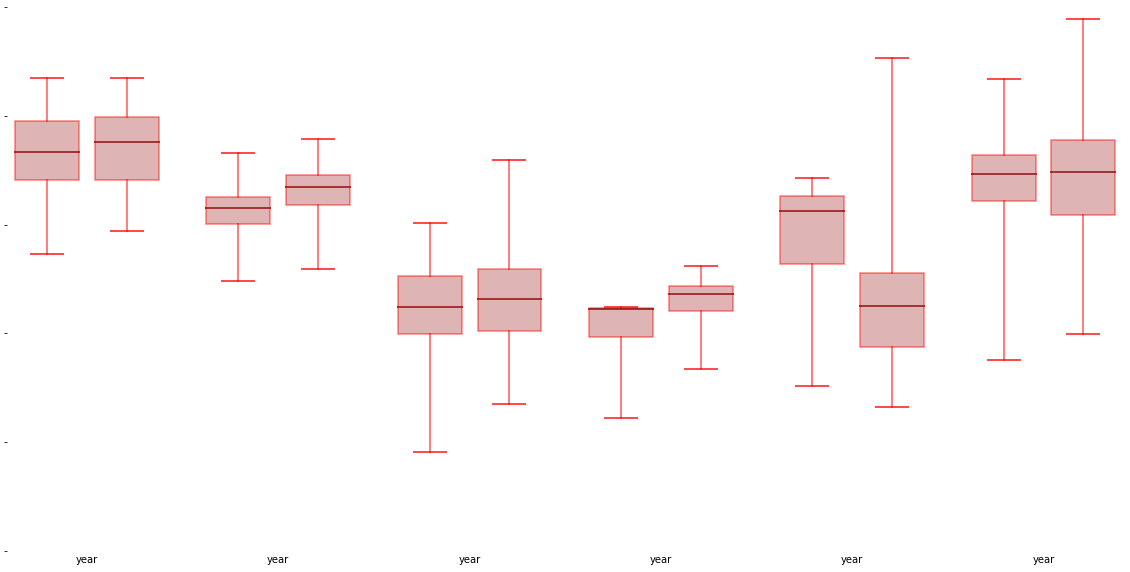

In [ ]:
boxprops1 = dict(alpha=.5, edgecolor = 'darkblue')
boxprops2 = dict(alpha=.5, edgecolor = 'r')
whiskerprops1 = dict(color = 'darkblue', alpha = 0.5, linewidth=2)
whiskerprops2 = dict(color = 'r', alpha = 0.5, linewidth=2)
capprops1 = dict(color = 'darkblue', alpha = 0.7, linewidth=2)
capprops2 = dict(color = 'r', alpha = 0.7, linewidth=2)
medianprops1 = dict(color = 'darkblue', alpha = 0.7, linewidth=2)
medianprops2 = dict(color = 'darkred', alpha = 0.7, linewidth=2)

print('Lake elevation distribution by region')
fig, ax = plt.subplots(1, 6, figsize = (20,10))
j = 0
for i in range(0,len(regions)):
    r = regions[j]
    rsur = surface[surface.region == r]
    rsub = subsurface[subsurface.region == r]
    
    #boxplots
    #sns.boxplot(x = rsur['year'], y = rsur['elevation'], ax=ax[i], orient = 'v', color = 'steelblue', boxprops=boxprops1, whiskerprops = whiskerprops1, capprops = capprops1, 
                #medianprops = medianprops1, whis = [0,100]) #plot 2018 elevations
    sns.boxplot(x = rsub['year'], y = rsub['elevation'], ax=ax[i], orient = 'v', color = 'indianred', boxprops=boxprops2, whiskerprops = whiskerprops2, capprops = capprops2, 
                medianprops = medianprops2, whis = [0,100]) #plot 2018 elevations

    sns.despine(ax=ax[i], bottom = True, left = True, offset=4, trim=False)
    ax[i].set_xticks([]) #get rid of x ticks
    ax[i].set_yticks([]) #get rid of x ticks
    ax[i].set_ylabel('')
    #ax[i].set_title(f'{regions[j]}', fontsize = 14)

    ax[i].set_ylim([0,2500])
    #ax[i].set_xlabel('2018  2019', fontsize = 12)

    j = j+1

ax[0].set_yticks([0,500,1000,1500,2000,2500])
ax[0].set_yticklabels([])
#ax[0].set_ylabel('Elevation (m)', fontsize = 16)
plt.savefig('/content/drive/My Drive/Research/Greenland_CNN_project/subsurface_elevation.png', dpi = 300, transparent=True)

    

Lake area distribution by region


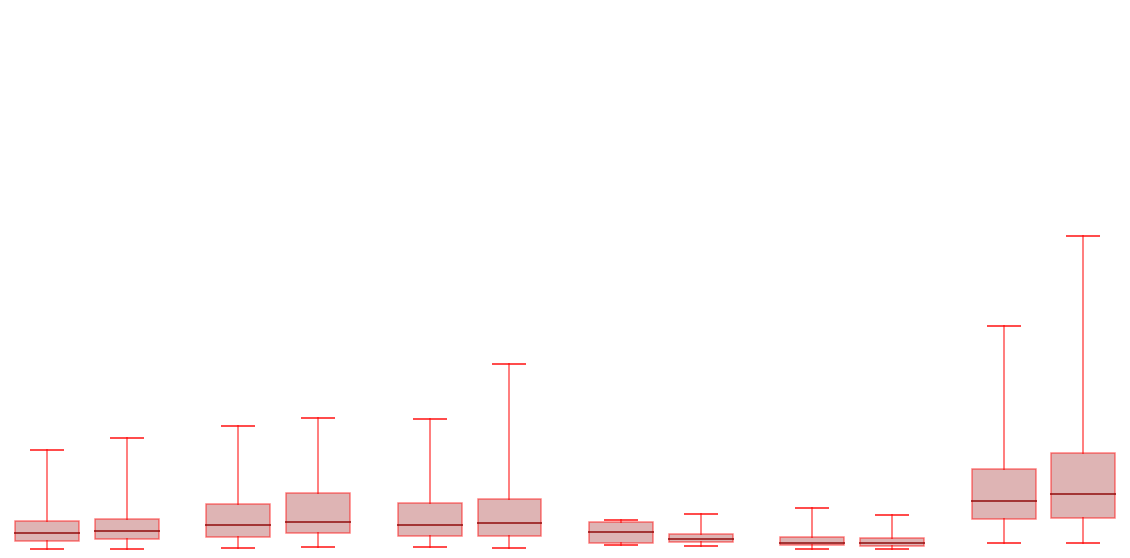

In [ ]:
boxprops1 = dict(alpha=.5, edgecolor = 'darkblue')
boxprops2 = dict(alpha=.5, edgecolor = 'r')
whiskerprops1 = dict(color = 'darkblue', alpha = 0.5, linewidth=2)
whiskerprops2 = dict(color = 'r', alpha = 0.5, linewidth=2)
capprops1 = dict(color = 'darkblue', alpha = 0.7, linewidth=2)
capprops2 = dict(color = 'r', alpha = 0.7, linewidth=2)
medianprops1 = dict(color = 'darkblue', alpha = 0.7, linewidth=2)
medianprops2 = dict(color = 'darkred', alpha = 0.7, linewidth=2)
vvmax = [19, 11, 9,9,23,5]

print('Lake area distribution by region')
fig, ax = plt.subplots(1, 6, figsize = (20,10))
j = 0
for i in range(0,len(regions)):
    r = regions[j]
    rsur = surface[surface.region == r]
    rsub = subsurface[subsurface.region == r]

    #boxplots
    #sns.boxplot(x = rsur['year'], y = rsur['area'], ax=ax[i], orient = 'v', color = 'steelblue', boxprops=boxprops1, whiskerprops = whiskerprops1, capprops = capprops1, 
                #medianprops = medianprops1, whis = [0,100]) #plot 2018 elevations
    sns.boxplot(x = rsub['year'], y = rsub['area']/1000**2, ax=ax[i], orient = 'v', color = 'indianred', boxprops=boxprops2, whiskerprops = whiskerprops2, capprops = capprops2, 
                medianprops = medianprops2, whis = [0,100]) #plot 2018 elevations
    sns.despine(ax=ax[i], bottom = True, left = True, offset=4, trim=False)
    ax[i].set_ylim([0,vvmax[i]])
    ax[i].set_xticks([]) #get rid of x ticks
    #ax[i].set_yticks([]) #get rid of x ticks
    ax[i].set_ylabel('')
    #ax[i].set_title(f'{regions[j]}', fontsize = 14)
    ax[i].set_yticks([])

    #ax[i].set_ylim([0,2500])
    ax[i].set_xlabel('', fontsize = 12)

    j = j+1

#ax[0].set_yticks([0,500,1000,1500,2000,2500])
#ax[0].set_yticklabels([0,500,1000,1500,2000,2500], fontsize = 12)
#ax[0].set_ylabel('Area (km$^2$)', fontsize = 16)
plt.savefig('/content/drive/My Drive/Research/Greenland_CNN_project/surface_area.png', dpi = 300, transparent=True)
    

In [10]:
subsurface

,year,region,area,elevation,surface
0,2018,SW,1.544035e+06,2080.300744,421.952941
1,2018,SW,1.592369e+06,1722.437669,223.352941
2,2018,SW,1.081723e+06,1805.465742,128.384314
3,2018,SW,1.776778e+06,1835.524246,469.474510
4,2018,SW,1.649302e+06,1571.356975,157.686275
...,...,...,...,...,...
968,2019,SE,1.504292e+05,1539.215598,0.000000
969,2019,SE,2.522208e+05,1261.594089,124.000000
970,2019,SE,2.275421e+05,1724.873568,0.000000
971,2019,SE,9.409499e+04,1817.599353,0.000000


In [20]:
p_2018 = list()
p_2019 = list()
p2 = list()
p3 = list()
for i in range(len(regions)):
    r = regions[i]
    rsub = subsurface[subsurface.region == r]
    rsub2018 = rsub[rsub.year == 2018]
    rsub2019 = rsub[rsub.year == 2019]
    rsub_sur2018 = rsub2018[rsub2018.surface > 5]
    rsub_sur2019 = rsub2019[rsub2019.surface > 5]
    r_sur = rsub[rsub.surface > 5]
    p_2018.append(len(rsub_sur2018)/len(rsub2018)*100)
    p_2019.append(len(rsub_sur2019)/len(rsub2019)*100)
    p2.append(len(r_sur)/len(rsub)*100)
    p3.append(100-(len(r_sur)/len(rsub)*100))

p = [p_2018, p_2019]


In [12]:
error2018 = np.array([1/np.sqrt(87),1/np.sqrt(89), 1/np.sqrt(119), 1/np.sqrt(4), 1/np.sqrt(19), 1/np.sqrt(56)])*100
error2019 = np.array([1/np.sqrt(80),1/np.sqrt(77), 1/np.sqrt(208), 1/np.sqrt(37), 1/np.sqrt(125), 1/np.sqrt(72)])*100


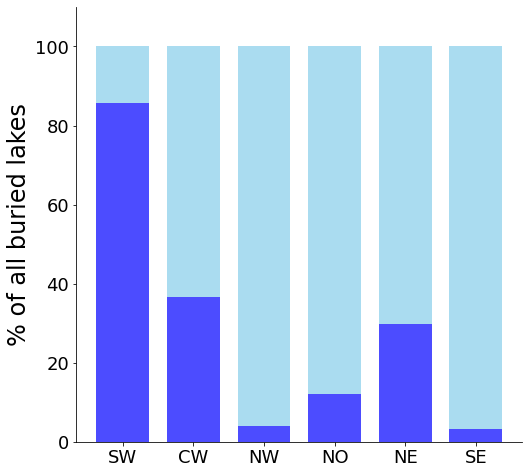

In [32]:

X = np.arange(6)

fig, ax = plt.subplots(1,1, figsize = (8,8))
#ax = fig.add_axes([0,0,1,1])
#ax.bar(X - 0.175, p[0], color = 'indianred', alpha = 1, width = 0.35, label = '2018',capsize=4)
ax.bar(X, p2,color = 'blue', alpha = 0.7, width = 0.75, label = '2019')
ax.bar(X, p3,color = 'skyblue', alpha = 0.7, width = 0.75, bottom = p2, label = '2019')
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(regions, fontsize = 18, fontname='Arial')
ax.set_yticks([0,20,40,60,80,100])
ax.set_yticklabels([0,20,40,60,80,100], fontsize = 18, fontname='Arial')
sns.despine(ax = ax)
ax.set_ylabel('% of all buried lakes', fontsize = 24, fontname='Arial')
#ax.legend(fontsize = 14, frameon = False, loc = 'upper center')
ax.set_ylim([0,110])
plt.savefig('/content/drive/My Drive/Research/Greenland_CNN_project/percent.png', dpi = 300, transparent = True)